In [5]:
from pathlib import Path
import numpy as np
import IPython.display as ipd
from simple_mp.simple import simple_fast
from tqdm import tqdm
import pandas as pd

root = Path("../data")
motif = root / "motif/train_short_audio"

data = []
for path in tqdm(motif.glob("**/motif.cens.*.npy")):
    data.append(dict(
        data=np.load(path),
        species=path.parent.parent.name,
        example_name=path.parent.name,
        motif_name=path.name,
        full_path=path
    ))

df = pd.DataFrame(data)
df.head()

1002it [00:00, 2021.86it/s]


,data,species,example_name,motif_name,full_path
0,"[[0.3756666878584689, 0.37259816530431233, 0.3...",acafly,XC109605,motif.cens.0.npy,..\data\motif\train_short_audio\acafly\XC10960...
1,"[[0.3526420750609852, 0.35178527616127747, 0.3...",acafly,XC109605,motif.cens.1.npy,..\data\motif\train_short_audio\acafly\XC10960...
2,"[[0.3247211285736167, 0.3227699842406104, 0.31...",acafly,XC11209,motif.cens.0.npy,..\data\motif\train_short_audio\acafly\XC11209...
3,"[[0.322090386851785, 0.3195279306817608, 0.317...",acafly,XC11209,motif.cens.1.npy,..\data\motif\train_short_audio\acafly\XC11209...
4,"[[0.28324403789352703, 0.2856009155957204, 0.2...",acafly,XC127032,motif.cens.0.npy,..\data\motif\train_short_audio\acafly\XC12703...


In [6]:
aca = df[df.species=="acafly"]

In [38]:
sample = aca.sample(2)
sample.example_name

28     XC136290
125    XC318882
Name: example_name, dtype: object

../data/motif/train_short_audio/acafly/XC136290/motif.0.ogg


../data/motif/train_short_audio/acafly/XC318882/motif.1.ogg


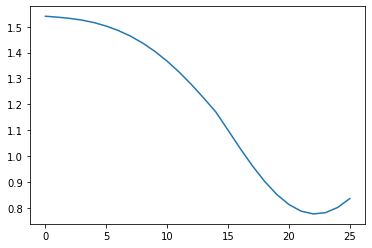

In [39]:
import matplotlib.pyplot as plt

mp, pi = simple_fast(sample.iloc[0].data, sample.iloc[1].data, 25)
plt.plot(mp)
for i in range(2):
    path = sample.iloc[i].full_path.as_posix().replace("npy", "ogg").replace(".cens", "")
    print(path)
    ipd.display(ipd.Audio(path))

In [66]:
import librosa

def cens_per_sec(sample_rate, target):
    """Ensure this value is a multiple of 2**6"""
    return (sample_rate // (target * (2 ** 6))) * (2 ** 6)

def read_cens(input_path, cens_sr=10):
    data, sample_rate = librosa.load(input_path)
    return librosa.feature.chroma_cens(
        data, sample_rate, hop_length=cens_per_sec(sample_rate, cens_sr)
    ), data

full_path = Path("../data/input/train_short_audio") / sample.iloc[0].species / f"{sample.iloc[0].example_name}.ogg"
full, full_data = read_cens(full_path)
motif = sample.iloc[1].data

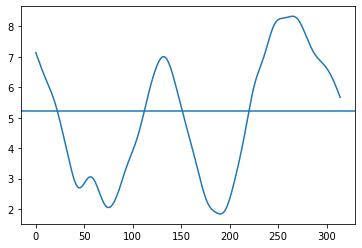

In [53]:
mp, pi = simple_fast(full, motif, 50)
plt.plot(mp)
plt.axhline(np.median(mp))

In [68]:
full.shape, mp.shape

((12, 364), (315,))

In [73]:
def get_transition_index(mp):
    v = (mp - np.median(mp)) > 0
    return np.where(v[:-1] != v[1:])[0]

def get_transition_seconds(data, mp, sample_rate=22050):
    indexes = get_transition_index(mp)
    n = len(mp)
    return ((indexes / n)*len(data)/sample_rate).round(1)

get_transition_seconds(full_data, mp)

array([ 2.5, 12.7, 17.2, 24.9])

In [54]:
ipd.display(ipd.Audio(full_path))